In [142]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ast

In [3]:
tj_locations = pd.read_pickle('tj_locations.pkl')
county_covid = pd.read_pickle('alameda_county_covid_july.pkl')

In [4]:
tj_locations.columns

Index(['safegraph_place_id', 'location_name', 'street_address', 'city',
       'region', 'postal_code', 'safegraph_brand_ids', 'brands',
       'date_range_start', 'date_range_end', 'raw_visit_counts',
       'raw_visitor_counts', 'visits_by_day', 'poi_cbg', 'visitor_home_cbgs',
       'visitor_daytime_cbgs', 'visitor_work_cbgs',
       'visitor_country_of_origin', 'distance_from_home', 'median_dwell',
       'bucketed_dwell_times', 'related_same_day_brand',
       'related_same_month_brand', 'popularity_by_hour', 'popularity_by_day',
       'device_type'],
      dtype='object')

In [143]:
def literal_data_return(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError) as e:
        return val

In [146]:
tj_locations['related_brand_literal'] = tj_locations['related_same_month_brand'].apply(literal_data_return)

In [138]:
def unpack_related_brand_col(df, column, fillna=None):
    ret = None
    if fillna is None:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems()))], axis=1)
        del ret[column]
    else:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems())).fillna(fillna)], axis=1)
        del ret[column]
    return ret

In [162]:
unpacked = unpack_related_brand_col(tj_locations, 'related_brand_literal', 0)

In [165]:
unpacked.columns

Index(['safegraph_place_id', 'location_name', 'street_address', 'city',
       'region', 'postal_code', 'safegraph_brand_ids', 'brands',
       'date_range_start', 'date_range_end', 'raw_visit_counts',
       'raw_visitor_counts', 'visits_by_day', 'poi_cbg', 'visitor_home_cbgs',
       'visitor_daytime_cbgs', 'visitor_work_cbgs',
       'visitor_country_of_origin', 'distance_from_home', 'median_dwell',
       'bucketed_dwell_times', 'related_same_day_brand',
       'related_same_month_brand', 'popularity_by_hour', 'popularity_by_day',
       'device_type', 'Pharmaca', 'Costco Wholesale Corp.', 'Safeway',
       'Starbucks', 'Target', 'The Home Depot', 'In-N-Out Burger', 'Walgreens',
       'Chevron', 'Peet's Coffee and Tea', 'Safeway Pharmacy',
       'Kaiser Permanente', '7-Eleven', '76', 'Costco Gasoline', 'ARCO',
       'Round Table Pizza', 'Ross Stores', 'Togo's Eateries', 'Marshalls',
       'IKEA', 'CVS', 'McDonald's', 'Lucky Supermarkets', 'Chevron Extra Mile',
       'Walmart',

In [172]:
coffee = [unpacked['Starbucks'].sum(), unpacked['Peet\'s Coffee and Tea'].sum()]

big_box = [unpacked['Walmart'].sum(),
           unpacked['Target'].sum(),
           unpacked['Costco Wholesale Corp.'].sum()]

groceries = [unpacked['Lucky Supermarkets'].sum(),
             unpacked['Sprouts Farmers Market'].sum(),
             unpacked['Safeway'].sum(),
             unpacked['Grocery Outlet'].sum()]

hardware = [unpacked['Lowe\'s'].sum(),
            unpacked['Ace Hardware'].sum(),
            unpacked['The Home Depot'].sum()]

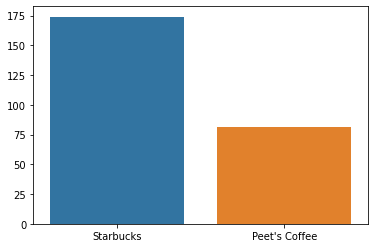

In [175]:
sns.barplot(x=['Starbucks','Peet\'s Coffee'],y=coffee)

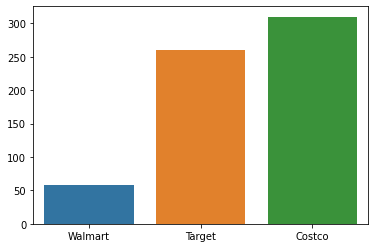

In [176]:
sns.barplot(x=['Walmart','Target','Costco'],y=big_box)

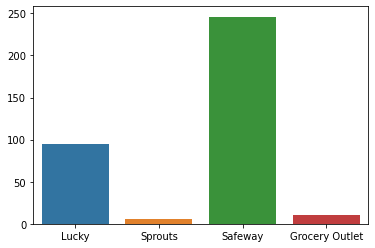

In [178]:
sns.barplot(x=['Lucky','Sprouts','Safeway','Grocery Outlet'], y=groceries)

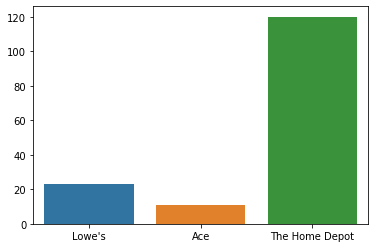

In [180]:
sns.barplot(x=['Lowe\'s','Ace','The Home Depot'],y=hardware)

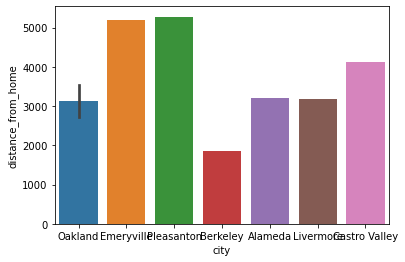

In [112]:
sns.barplot(x=tj_locations.city,y=tj_locations.distance_from_home)

In [5]:
Oakland1 = [3,0,2,0,4,5,5,1,1,1,5,2,2,3,4,0,2,4,4,6,4,3,7,2,2,5,4,5,6,2,3]
Emeryville = [10,8,4,0,9,16,9,9,5,10,13,20,8,8,12,15,5,6,13,12,13,7,8,7,11,11,8,9,9,15,9]
Pleasanton = [0,0,3,0,2,1,1,1,0,0,2,2,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0]
Berkeley = [5,10,5,1,7,4,7,2,6,3,3,5,2,5,3,11,3,6,2,3,4,5,5,5,6,2,4,3,2,8,6]
Alameda = [14,13,29,6,11,15,12,10,12,13,11,21,18,13,11,9,12,15,14,21,13,11,9,26,14,18,11,4,13,18,21]
Livermore = [12,14,12,0,16,6,5,9,8,12,15,13,10,11,6,15,14,9,14,9,11,9,14,17,9,8,9,17,7,8,11]
Oakland2 = [2,11,3,1,9,4,6,1,5,3,5,6,8,4,2,4,2,5,3,6,3,2,4,2,4,5,4,5,2,4,8]
Castro = [38,27,35,2,51,43,34,25,36,41,39,37,39,39,37,30,36,49,41,43,42,35,31,28,33,46,41,37,29,28,32]
days = list(range(1,len(Berkeley)))

In [6]:
tj_july_visits_by_day = pd.DataFrame(list(zip(Oakland1, Emeryville, Pleasanton,Berkeley, Alameda, Livermore, Oakland2, Castro)))

In [82]:
tj_july_visits_by_day.loc["Total"] = tj_july_visits_by_day.sum()
weekday = ['W','Th','F','Sat','Su','M','T','W','Th','F','Sat','Su','M','T','W','Th','F','Sat','Su','M','T','W','Th','F','Sat','Su','M','T','W','Th','F','-']

In [84]:
tj_july_visits_by_day['weekday'] = weekday

Text(0.5, 1.0, 'Busiest Weekday As Relative Percentage of Total')

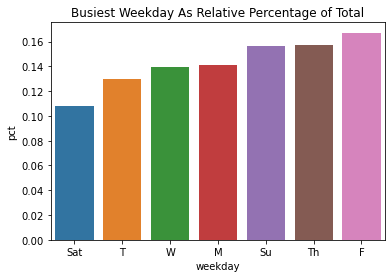

In [108]:
day_of_week = tj_july_visits_by_day.groupby('weekday').sum()
day_of_week.reset_index()
pct_total = day_of_week.pct.sort_values()[:-1]
sns.barplot(x=pct_total.index,y=pct_total)
plt.title('Busiest Weekday As Relative Percentage of Total')
# day_of_week['weekday'] = pd.Categorical(day_of_week['weekday'], ["M", "T", "W","Th","F","Sat","Su"])
# day_of_week[1:].sort_values('pct')

In [29]:
cases = county_covid.cases.diff().fillna(0)
deaths = county_covid.deaths.diff().fillna(0)

In [182]:
tj_july_visits_by_day.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 'sum', 'pct', 'weekday'], dtype='object')

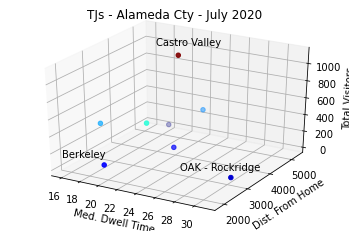

In [132]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xdata = tj_locations.median_dwell
ydata = tj_locations.distance_from_home
zdata = [97, 299, 17, 143, 438, 330, 133, 1104.0]
ax.set_title('TJs - Alameda Cty - July 2020')
ax.set_xlabel('Med. Dwell Time')
ax.set_ylabel('Dist. From Home')
ax.set_zlabel('Total Visitors')
ax.text(25, 3000, 0, "OAK - Rockridge", color='black')
ax.text(15, 2000, 100, "Berkeley", color='black')
ax.text(20, 4000, 1200, "Castro Valley", color='black')
ax.yaxis.set_ticks(np.arange(0, 5500, 1000))
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='jet')

In [183]:
tj_july_visits_by_day.columns = ['OAK-Rockridge', 'Emeryville', 'Pleasanton','Berkeley', 'Alameda', 'Livermore', 'OAK-Lakeshore', 'Castro Valley', 'sum', 'pct', 'weekday']

In [191]:
weekday_avg = tj_july_visits_by_day.groupby(by='weekday').mean().drop(['sum','pct'],axis=1).drop('-')

In [195]:
order = ['M','T','W','Th','F','Sat','Su']
weekday_avg = weekday_avg.reindex(order)
weekday_avg

,OAK-Rockridge,Emeryville,Pleasanton,Berkeley,Alameda,Livermore,OAK-Lakeshore,Castro Valley
weekday,,,,,,,,
M,4.25,11.00,0.25,3.25,16.25,8.50,5.50,41.50
T,4.25,9.75,0.50,4.75,10.50,11.00,4.50,38.00
W,3.40,9.40,0.40,3.40,11.80,8.60,1.80,32.80
Th,2.00,10.20,0.20,8.00,12.20,11.80,5.60,30.40
F,2.00,7.00,0.80,4.40,20.20,13.20,3.60,34.40
Sat,2.75,7.50,0.75,4.00,11.50,8.25,3.75,30.75
Su,3.75,13.25,1.00,4.00,16.00,12.75,5.75,43.75


Text(0.5, 1.0, 'Average Visitor Total by Weekday')

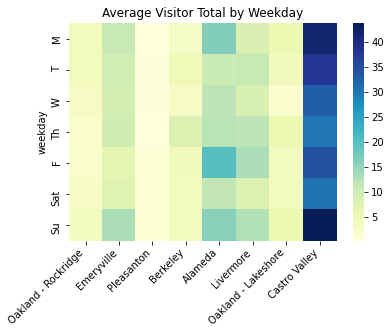

In [211]:
c = sns.heatmap(weekday_avg,cmap='YlGnBu')
c.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Average Visitor Total by Weekday')

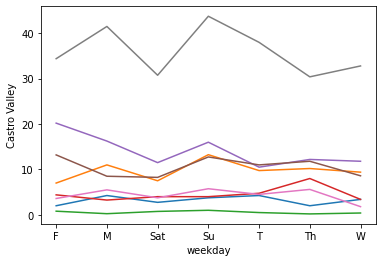

In [203]:
for location in weekday_avg.columns:
    sns.lineplot(x=weekday_avg.index,y=weekday_avg[location])

In [49]:
total = 2561
store_contribution = [97/total,299/total,17/total,43/total, 438/total,330/total,133/total,1104/total]

In [65]:
y = tj_july_visits_by_day.loc['Total'][:-2].sort_values()

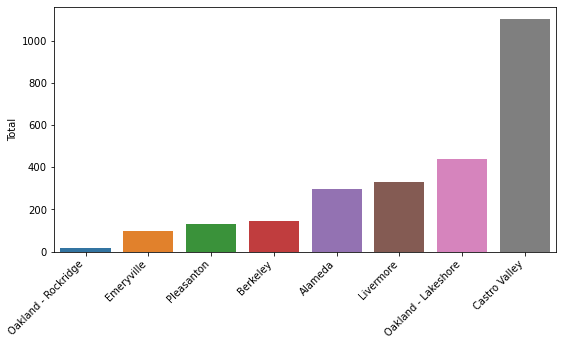

In [74]:
plt.figure(figsize=(9,4.5))
chart = sns.barplot(x=['Oakland - Rockridge', 'Emeryville', 'Pleasanton','Berkeley', 'Alameda', 'Livermore', 'Oakland - Lakeshore', 'Castro Valley'],
            y=y)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

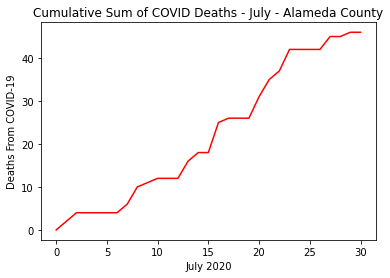

In [37]:
plt.plot(list(range(0,len(deaths))),deaths.cumsum(),'r')
plt.xlabel('July 2020')
plt.ylabel('Deaths From COVID-19')
plt.title('Cumulative Sum of COVID Deaths - July - Alameda County')
plt.savefig('deaths.jpg')

In [13]:
cases_all_year = pd.read_pickle('all_alameda_cases.pkl')

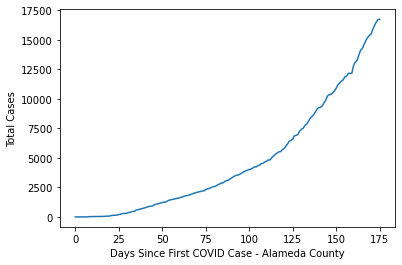

In [38]:
plt.plot(list(range(0,len(cases_all_year))),cases_all_year.cases)
plt.xlabel('Days Since First COVID Case - Alameda County')
plt.ylabel('Total Cases')
plt.savefig('casestotal.jpg')

In [206]:
tj_july_visits_by_day

,OAK-Rockridge,Emeryville,Pleasanton,Berkeley,Alameda,Livermore,OAK-Lakeshore,Castro Valley,sum,pct,weekday
0,3.0,10.0,0.0,5.0,14.0,12.0,2.0,38.0,84.0,0.032800,W
1,0.0,8.0,0.0,10.0,13.0,14.0,11.0,27.0,83.0,0.032409,Th
2,2.0,4.0,3.0,5.0,29.0,12.0,3.0,35.0,93.0,0.036314,F
3,0.0,0.0,0.0,1.0,6.0,0.0,1.0,2.0,10.0,0.003905,Sat
4,4.0,9.0,2.0,7.0,11.0,16.0,9.0,51.0,109.0,0.042561,Su
5,5.0,16.0,1.0,4.0,15.0,6.0,4.0,43.0,94.0,0.036704,M
6,5.0,9.0,1.0,7.0,12.0,5.0,6.0,34.0,79.0,0.030847,T
7,1.0,9.0,1.0,2.0,10.0,9.0,1.0,25.0,58.0,0.022647,W
8,1.0,5.0,0.0,6.0,12.0,8.0,5.0,36.0,73.0,0.028504,Th
9,1.0,10.0,0.0,3.0,13.0,12.0,3.0,41.0,83.0,0.032409,F


In [24]:
tj_july_visits_by_day['pct'] = tj_july_visits_by_day['sum'] / tj_july_visits_by_day['sum'].sum() 

In [27]:
tj_july_visits_by_day['sum'].sum()

2561

In [21]:
cases = list(cases)
visits = list(tj_july_visits_by_day['sum'].iloc[1:])

In [22]:
len(cases)

31

In [205]:
for location in weekday_avg.columns:
    print(weekday_avg[location].std())

0.968676072448026
2.111843022665499
0.30059464875001163
1.611528407917096
3.513155548045362
2.117922387174572
1.4313247277227052
5.2601036564112


In [ ]:
for location in weekday_avg.columns:
    sns.distplot(x=weekday_avg.index,y=weekday_avg[location])
sns.plt.legend()

In [ ]:
sns.scatterplot(x=tj_locations)